**SEABORN**

**Exercices**

**Exercice 1 -  Visualisation des notes des étudiants :**
* a) Chargez le fichier "student_grades.csv" dans un DataFrame nommé "grades_df".
* b) Utilisez Seaborn pour créer un histogramme représentant la distribution des notes des étudiants.


In [ ]:
import pandas as pd

path_csv = "student_grades.csv"
grades_df = pd.read_csv(path_csv, header=None, names=['ID', 'salle', 'note'])

# Création d'un dictionnaire pour faire correspondre les notes alphabetiques avec les notes numeriques
grade_to_num = {
    'E-': 0, 'E': 1, 'E+': 2,
    'D-': 3, 'D': 4, 'D+': 5,
    'C-': 6, 'C': 7, 'C+': 8,
    'B-': 9, 'B': 10, 'B+': 11,
    'A-': 12, 'A': 13, 'A+': 14,
}

# On place donc les valeurs decimales associées aux notes alphabetiques grace au map dans une nouvelle colonne note_dec
grades_df['note_dec'] = grades_df['note'].map(grade_to_num)

# On transforme en note sur 20
# Avec fonction .apply
grades_df['note_dec'] = grades_df['note_dec'].apply(lambda x: (x / 14) * 20)

# Version sans fonction, mais avec operation vectorisée
#grades_df['note_dec'] = (grades_df['note_dec']/14)*20

# Ajout d'une colonne 'result' contenant 'Réussite' si note >=10 sinon 'Echec'   
grades_df['result'] = grades_df['note_dec'].apply(lambda x: "Réussite" if x >= 10 else "Échec")

print(grades_df)

In [ ]:
# installation de seaborn depuis un Notebook Jupyter
!pip install seaborn

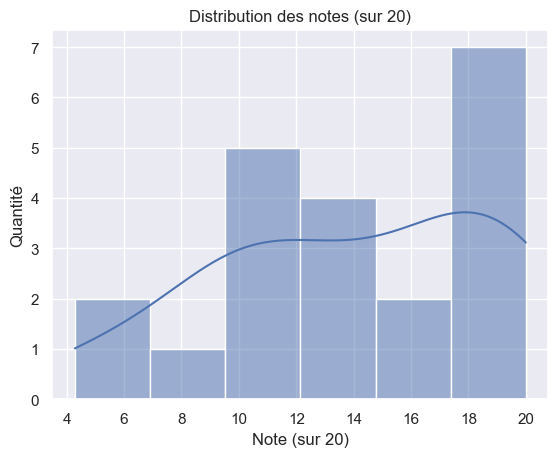

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.histplot(data=grades_df, x="note_dec", kde=True)

plt.title("Distribution des notes (sur 20)")
plt.xlabel("Note (sur 20)")
plt.ylabel("Quantité")

plt.show()


**Exercice 2 - Comparaison des notes en fonction des salles :**
* a) Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant la moyenne des notes des étudiants pour chaque salle.


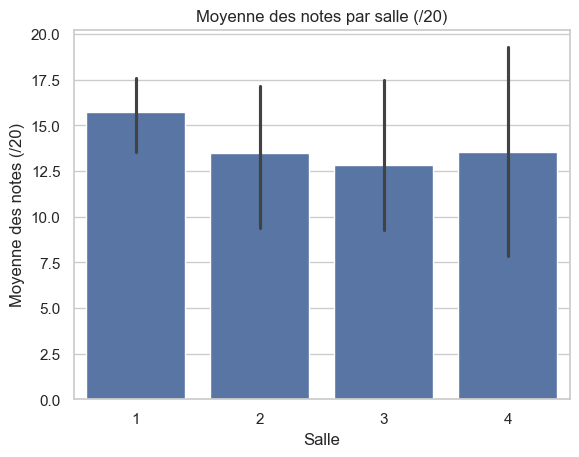

In [ ]:
sns.set(style="whitegrid")

sns.barplot(data=grades_df, x="salle", y="note_dec", estimator="mean") # estimator="mean" calcule la moyenne de note_dec par salle (de y par x)

plt.title("Moyenne des notes par salle (/20)")
plt.xlabel("Salle")
plt.ylabel("Moyenne des notes (/20)")

plt.show()


**Exercice 3 - Comparaison des notes en fonction du statut de réussite :**
* a) Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant le nombre d'étudiants ayant réussi et échoué.


Text(0, 0.5, "Nombred'etudiants")

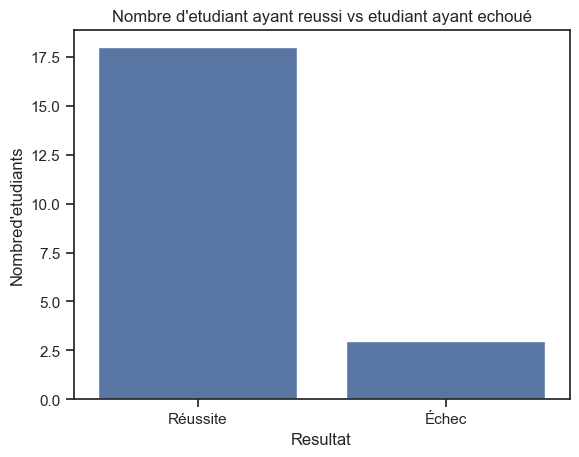

In [30]:
sns.set(style="ticks")

# countplot compte automatiquement les occurences de chaque valeur dans result
sns.countplot(data=grades_df, x = 'result')

plt.title("Nombre d'etudiant ayant reussi vs etudiant ayant echoué")
plt.xlabel("Resultat")
plt.ylabel("Nombred'etudiants")

**Exercice 4 - Visualisation de la corrélation entre les variables :**
* a) Chargez le fichier "titanic.csv" dans un DataFrame nommé "titanic_df".
* b) Utilisez Seaborn pour créer une matrice de corrélation pour les variables numériques du DataFrame "titanic_df".


In [ ]:
# a)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

titanic_df = pd.read_csv(url)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


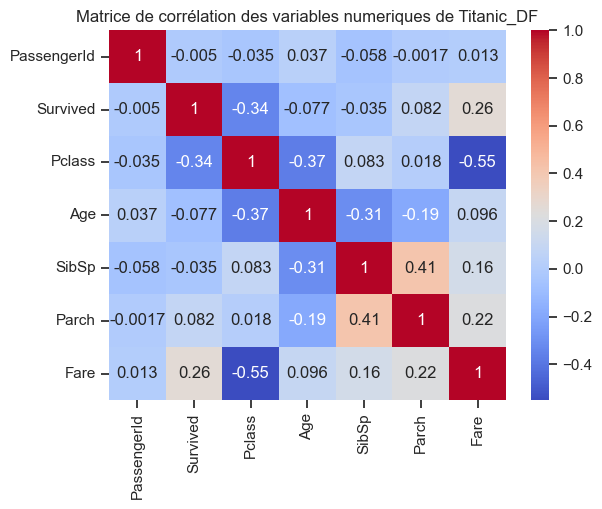

In [ ]:
# Selection des colonnes numeriques
numerical_columns = titanic_df.select_dtypes(include=['int64', 'float64'])

# Creation d'une matrice de correlation sur les valeurs numeriques (seulement les colonnes numeriques) avec Pandas, NumPy possible aussi (cf: np.corrcoef)
correlation_matrix = numerical_columns.corr()

print(correlation_matrix)

# Visualisation avec Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables numeriques de Titanic_DF")
plt.show()

# Correlation positive (+) les deux variables augmentent ensemble
# Exemple : Fare et Survived = 0.26
# Quand le prix du billet augmente, la probabilité de survie tend à augmenter.

# Correaltion negative (-) une variable augmente lautre diminue
# Exemple : Pclass et Survived = -0.34
# Plus la classe est haute (Pclass=1 → première classe), 
# plus la survie augmente → mais comme Pclass=1 < Pclass=3, 
# la corrélation est négative

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


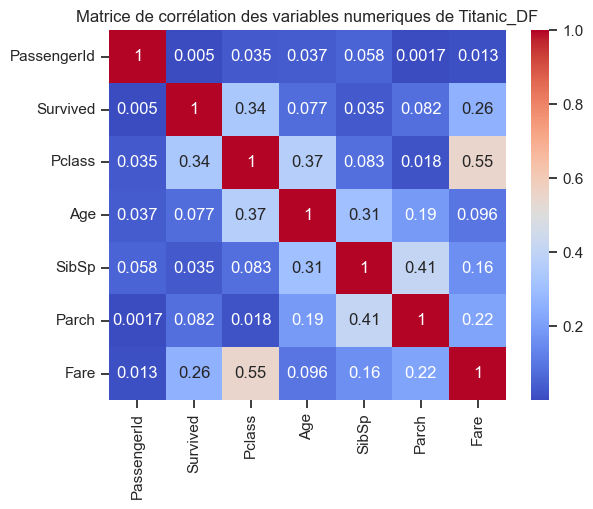

In [ ]:
# Version avec valeurs absolues perte de la direction 
# Selection des colonnes numeriques
numerical_columns = titanic_df.select_dtypes(include=['int64', 'float64'])

# Creation d'une matrice de correlation sur les valeurs numeriques (seulement les colonnes numeriques) avec Pandas, NumPy possible aussi (cf: np.corrcoef)
correlation_matrix = numerical_columns.corr()
# Création d'une matrice Absolue
correlation_matrix_absolute = correlation_matrix.abs()
print(correlation_matrix)

# Visualisation avec Seaborn
sns.heatmap(correlation_matrix_absolute, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables numeriques de Titanic_DF")
plt.show()